In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# Cargar el dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Visualizaci n inicial de los datos
print(df.info())
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
# Verificar valores ausentes
print(df.isnull().sum())
# Tratamiento de valores atípicos utilizando IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3- Q1
df_cleaned = df[~((df < (Q1- 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Tamaño de los datos después de la limpieza: {df_cleaned.shape}')

# Identify 'mean' and 'worst' features
mean_features = [col for col in df.columns if 'mean' in col]
worst_features = [col for col in df.columns if 'worst' in col]

# Create difference and ratio features
for feature in mean_features:
    corresponding_worst_feature = feature.replace('mean', 'worst')
    if corresponding_worst_feature in df_cleaned.columns:
        # Difference between worst and mean
        diff_feature_name = feature + '_worst_diff'
        df_cleaned[diff_feature_name] = df_cleaned[corresponding_worst_feature] - df_cleaned[feature]
        
        # Ratio of worst to mean
        ratio_feature_name = feature + '_worst_ratio'
        df_cleaned[ratio_feature_name] = df_cleaned[corresponding_worst_feature] / df_cleaned[feature].replace(0, np.nan)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Tamaño de los datos después de la limpieza: (398, 31)


C:\Users\usuario\AppData\Local\Temp\ipykernel_23676\3038093290.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[diff_feature_name] = df_cleaned[corresponding_worst_feature] - df_cleaned[feature]
C:\Users\usuario\AppData\Local\Temp\ipykernel_23676\3038093290.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[ratio_feature_name] = df_cleaned[corresponding_worst_feature] / df_cleaned[feature].replace(0, np.nan)
C:\Users\usuario\AppData\Local\Temp\ipykernel_23676\3038093290.py:20: Se

In [23]:
# Normalización
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned.drop('target', axis=1)), columns=df_cleaned.
columns[:-1])

# Estandarización
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_cleaned.drop('target', axis=1)),
columns=df_cleaned.columns[:-1])

# Añadir la columna 'target' nuevamente
df_scaled['target'] = df_cleaned['target'].values
df_standardized['target'] = df_cleaned['target'].values

In [24]:
# Separar los datos originales
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size
=0.2, random_state=42)
# Definir el modelo de la red neuronal
model_original = Sequential()
model_original.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model_original.add(Dense(8, activation='relu'))
model_original.add(Dense(1, activation='sigmoid'))
# Compilar el modelo
model_original.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Entrenar el modelo
history_original = model_original.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)
# Evaluar el modelo en los datos de prueba
loss, accuracy = model_original.evaluate(X_test, y_test)
print(f"Accuracy con datos originales: {accuracy}")

Epoch 1/50


c:\Users\usuario\anaconda3\envs\env_101\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4263 - loss: 52.2280 - val_accuracy: 0.3626 - val_loss: 19.7259
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4265 - loss: 11.0890 - val_accuracy: 0.7802 - val_loss: 1.1545
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.7330 - val_accuracy: 0.8901 - val_loss: 0.4706
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8992 - loss: 0.3252 - val_accuracy: 0.8901 - val_loss: 0.4347
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8959 - loss: 0.3431 - val_accuracy: 0.8901 - val_loss: 0.3006
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9173 - loss: 0.2675 - val_accuracy: 0.8901 - val_loss: 0.2728
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9076 - loss: 0.2484 - val_accuracy: 0.8901 - val_loss: 0.2659
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9117 - loss: 0.2896 - val_accuracy: 0.8791 - val_loss: 0.2647


In [27]:
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# For the genetic algorithm
from deap import base, creator, tools, algorithms

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Genetic Algorithm Setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizing accuracy
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

# Attribute generators
# For feature selection (binary genes)
def attr_bool():
    return random.randint(0, 1)

# For hyperparameters
def attr_n_neurons1():
    return random.randint(8, 64)  # Number of neurons in first hidden layer

def attr_n_neurons2():
    return random.randint(4, 32)  # Number of neurons in second hidden layer

def attr_learning_rate():
    return random.randint(10, 100)  # Will be scaled to [0.0001, 0.01]

def attr_batch_size():
    return random.randint(10, 100)  # Batch size between 10 and 100

# Define the individual creation function
def create_individual():
    n_features = X_train.shape[1]
    # Binary genes for feature selection
    features = [attr_bool() for _ in range(n_features)]
    # Hyperparameters
    n_neurons1 = attr_n_neurons1()
    n_neurons2 = attr_n_neurons2()
    learning_rate = attr_learning_rate()
    batch_size = attr_batch_size()
    # Combine all genes into one individual
    individual = creator.Individual(features + [n_neurons1, n_neurons2, learning_rate, batch_size])
    return individual

# Register functions in the toolbox
toolbox.register("individual", create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def evaluate(individual):
    n_features = X_train.shape[1]
    # Extract selected features
    selected_features = [i for i in range(n_features) if individual[i] == 1]
    if len(selected_features) == 0:
        return 0.0,  # Avoid empty feature sets

    # Extract hyperparameters
    n_neurons1 = individual[n_features]
    n_neurons2 = individual[n_features + 1]
    learning_rate_int = individual[n_features + 2]
    batch_size = individual[n_features + 3]
    learning_rate = learning_rate_int / 10000.0  # Scale to [0.0001, 0.01]

    # Prepare the data with selected features
    X_train_sel = X_train.iloc[:, selected_features]
    X_val_sel = X_val.iloc[:, selected_features]

    # Build the neural network model
    model = Sequential()
    model.add(Input(shape=(X_train_sel.shape[1],)))
    model.add(Dense(n_neurons1, activation='relu'))
    model.add(Dense(n_neurons2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model (using fewer epochs for speed)
    try:
        history = model.fit(X_train_sel, y_train, epochs=50, batch_size=batch_size, verbose=0,
                            validation_data=(X_val_sel, y_val))
        # Evaluate the model on the validation set
        loss, accuracy = model.evaluate(X_val_sel, y_val, verbose=0)
        return accuracy,
    except Exception as e:
        # In case of any error during training (e.g., invalid hyperparameters), return zero fitness
        return 0.0,

# Custom mutation function
def custom_mutate(individual, indpb):
    n_features = X_train.shape[1]
    # Mutate features
    for i in range(n_features):
        if random.random() < indpb:
            individual[i] = 1 - individual[i]  # Flip bit

    # Mutate hyperparameters
    if random.random() < indpb:
        individual[n_features] = attr_n_neurons1()
    if random.random() < indpb:
        individual[n_features + 1] = attr_n_neurons2()
    if random.random() < indpb:
        individual[n_features + 2] = attr_learning_rate()
    if random.random() < indpb:
        individual[n_features + 3] = attr_batch_size()

    return individual,

# Register genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", custom_mutate, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Genetic Algorithm parameters
population_size = 40  # Reduced for computational efficiency
num_generations = 10   # Reduced number of generations
cxpb = 0.5            # Crossover probability
mutpb = 0.2           # Mutation probability

# Create the population
population = toolbox.population(n=population_size)

# Run the genetic algorithm
result_population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, num_generations, verbose=True)

# Select the best individual
best_individual = tools.selBest(result_population, k=1)[0]

# Extract features and hyperparameters from the best individual
n_features = X_train.shape[1]
selected_features = [i for i in range(n_features) if best_individual[i] == 1]
n_neurons1 = best_individual[n_features]
n_neurons2 = best_individual[n_features + 1]
learning_rate_int = best_individual[n_features + 2]
batch_size = best_individual[n_features + 3]
learning_rate = learning_rate_int / 10000.0
best_fitness = best_individual.fitness.values[0]

# Output the results
print(f"\nBest Features Selected: {selected_features}")
print(f"Number of Neurons in First Hidden Layer: {n_neurons1}")
print(f"Number of Neurons in Second Hidden Layer: {n_neurons2}")
print(f"Learning Rate: {learning_rate}")
print(f"Batch Size: {batch_size}")
print(f"Best Fitness (Validation Accuracy): {best_fitness}")

c:\Users\usuario\anaconda3\envs\env_101\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\usuario\anaconda3\envs\env_101\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	20    
1  	14    
2  	13    
3  	16    
4  	12    
5  	13    

Best Features Selected: [0, 2, 8, 16, 20, 21, 22, 23, 24, 27]
Number of Neurons in First Hidden Layer: 32
Number of Neurons in Second Hidden Layer: 7
Learning Rate: 0.0018
Batch Size: 29
Best Fitness (Validation Accuracy): 0.9450549483299255


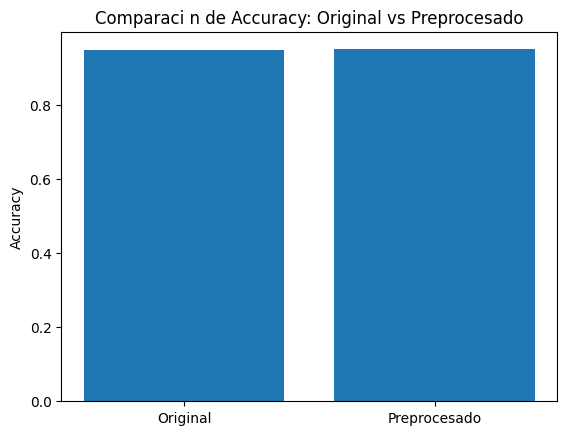

In [11]:
# Comparaci n de precisi n
plt.bar(['Original', 'Preprocesado'], [accuracy, accuracy_preprocessed])
plt.title('Comparaci n de Accuracy: Original vs Preprocesado')
plt.ylabel('Accuracy')
plt.show()